# Clustering

### Imports

In [40]:
# std
import matplotlib.pyplot as plt

# 3rd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from mpl_toolkits.mplot3d import Axes3D

### Load data

In [47]:
df = pd.read_csv('data/apartments-geo.csv')
coordinates = df[['lng', 'lat', 'rent', 'size']].loc[~(df['lat'].isna()) & ~(df['lng'].isna()) & (df['rent'] > 0) & (df['size'] > 0)].drop_duplicates()
coordinates['rent'] = coordinates['rent'] / coordinates['size']
coordinates = coordinates.drop('size', axis=1).as_matrix()
coordinates

array([[-118.3027    ,   34.0606    ,    4.        ],
       [-118.3027    ,   34.0606    ,    5.65217391],
       [-118.3027    ,   34.0606    ,    7.34260272],
       ...,
       [-122.429     ,   37.6247    ,    2.94117647],
       [-122.429     ,   37.6247    ,    3.25789474],
       [-122.429     ,   37.6247    ,    3.73636364]])

### Points exploratory

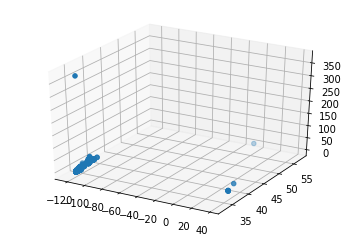

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2])

### Remove isolated points

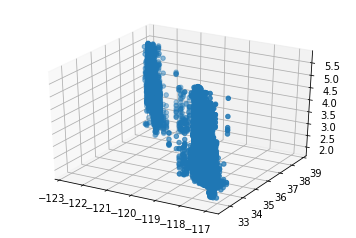

In [54]:
avg = coordinates.mean(axis=0)
cleaned_coordinates = []
for x in coordinates:
    if abs(x[0] - avg[0]) / abs(avg[0]) <= 0.5 and abs(x[1] - avg[1]) / abs(avg[1]) <= 0.5 and abs(x[2] - avg[2]) / abs(avg[2]) <= 0.5:
        cleaned_coordinates.append(x)
        
cleaned_coordinates = np.array(cleaned_coordinates)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cleaned_coordinates[:,0], cleaned_coordinates[:,1], cleaned_coordinates[:,2])

### Kmeans with isolated points (Elbow method)

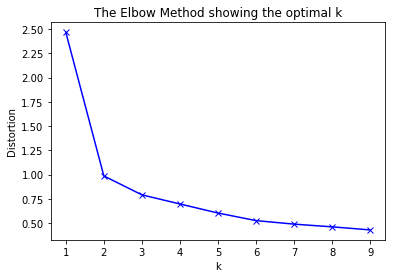

In [55]:
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(cleaned_coordinates)
    kmeanModel.fit(cleaned_coordinates)
    distortions.append(sum(np.min(cdist(cleaned_coordinates, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cleaned_coordinates.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Plot K-means

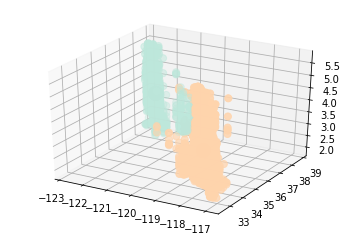

In [58]:
kmeanModel = KMeans(n_clusters=2).fit(cleaned_coordinates)
kmeanModel.fit(cleaned_coordinates)
y_kmeans = kmeanModel.predict(cleaned_coordinates)
"""plt.scatter(cleaned_coordinates[:,0], cleaned_coordinates[:,1], c=y_kmeans, s=50, cmap='icefire')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.plot()"""

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cleaned_coordinates[:,0], cleaned_coordinates[:,1], cleaned_coordinates[:,2], c=y_kmeans, s=50, cmap='icefire')
centers = kmeanModel.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)